# A calculation of the order of convergence when the limit value is unknown

## _This problem is an optional extension of the previous exercise sheets_

<span style="color:green">JMS</span>.

<span style="color:yellow">optional, You almost got it! </span>.

Assume we have determined numerically an approximate value $f_{\Delta x}$ of a function (for example, of a derivative) using a numerical mesh with grid cells $\Delta x$. We say that a numerical approximation converges toward a limit value $f_{lim}$ with $m$-order approximation if we can write to leading order for all $\Delta x$ which are sufficiently small.

$$f_{\Delta x} = f_{lim} + A(\Delta x)^m  \tag{1}$$

with $A$ a constant. If the global domain in $x$ has length $L$ and has been divided into $N$ intervals (so that  $\Delta x = L/N$), then we have:

$$f_N = f_{lim} + A\left(\frac{L}{N}\right)^m  \tag{2}$$

From there it is straightforward to obtain:

$$\frac{f_{4N}-f_{2N}}{f_{2N}-f_{N}} = \frac{4^{m}-2^{m}}{2^{m}-1} = 2^{m}  \tag{3}$$

or, in other words,

$$m = \log\left(\frac{f_{4N}-f_{2N}}{f_{2N}-f_{N}}\right)/\log2  \tag{4}$$

with log the natural logarithm. Thus, if we obtain a numerical value for a function at a given point with increasing order of approximation using $N$, $2N$, and $4N$ intervals in a given domain, we can calculate the order $m$ of the approximation using Eq. (4) without having to know in advance the exact analytical limit value. Test this method with `np.deriv_cent` and `np.deriv_4tho` and fill in `nm.order_conv`.

In [180]:
import numpy as np
import matplotlib.pyplot as plt 
from nm_lib import nm_lib as nm

In [181]:
## Define intervals 
nump = 128      # Number of points
x0   = -4.0 
xf   = 10.0

def h(x): 
    r""" 
    Solves the function h(x) from equation 1) 

    Parameters
    ----------
    x : `array`
       Spatial axis. 
       
    Returns
    ------- 
    `array`
        Spatial evolution of the function h(x) 
    """
    return np.cos(np.pi*(x-1) / 2) * np.exp(-((x-3) / 2.5)**2)

xx1  = np.arange(  nump + 1)/(  nump) * (xf-x0) + x0
xx2  = np.arange(2*nump + 1)/(2*nump) * (xf-x0) + x0
xx4  = np.arange(4*nump + 1)/(4*nump) * (xf-x0) + x0

hh = h(xx1)
hh2 = h(xx2)
hh4 = h(xx4)

In [182]:
dx_cent = nm.deriv_cent(xx1, hh)
dx2_cent = nm.deriv_cent(xx2, hh2)
dx4_cent = nm.deriv_cent(xx4, hh4)

dx_4tho = nm.deriv_4tho(xx1, hh)
dx2_4tho = nm.deriv_4tho(xx2, hh2)
dx4_4tho = nm.deriv_4tho(xx4, hh4)

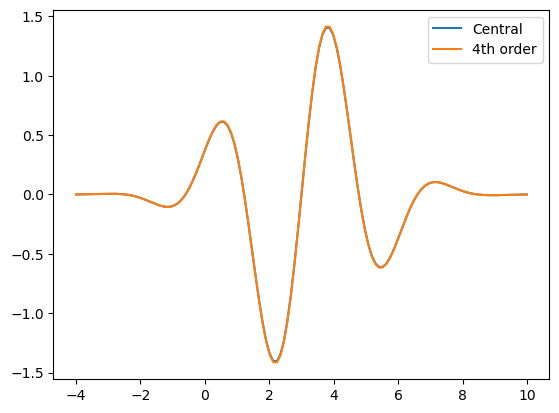

In [183]:
# plot xx against nm.order_conv 
plt.plot(xx1, dx_cent, label='Central')
plt.plot(xx1, dx_4tho, label='4th order')
plt.legend()  

<span style="color:pink">

After changing the function `deriv_4tho` so that it uses rolling instead of slicing, the function looks good. 

</span>

Order of convergence for central difference: -1.99
Order of convergence for 4th order difference: -4.08


/home/semya/cs/AST5110/nm_lib/nm_lib/nm_lib.py:108: RuntimeWarning: divide by zero encountered in divide
  return np.ma.log((hh4 - hh2)/(hh2 - hh))/np.log(2)


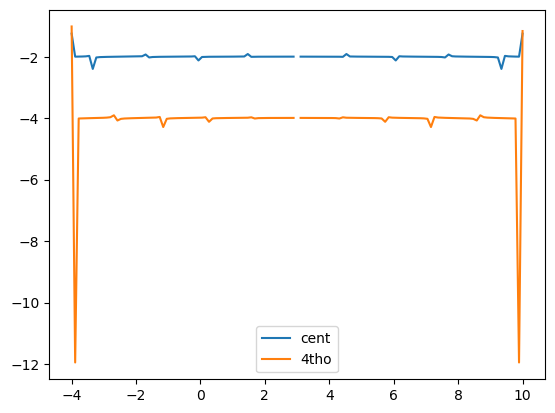

In [184]:
m_cent = nm.order_conv(dx_cent, dx2_cent, dx4_cent)
m_4tho = nm.order_conv(dx_4tho, dx2_4tho, dx4_4tho)

print(f"Order of convergence for central difference: {np.mean(m_cent):.2f}")
print(f"Order of convergence for 4th order difference: {np.mean(m_4tho):.2f}")

plt.plot(xx1, m_cent, label="cent")
plt.plot(xx1, m_4tho, label="4tho")
plt.legend()


<span style="color:pink">

As expected, the order of convergence is 2 for `deriv_cent` and 4 for `derv_4tho`. Dependint on the method, it looks like a few points should be removed on either end: 

</span>

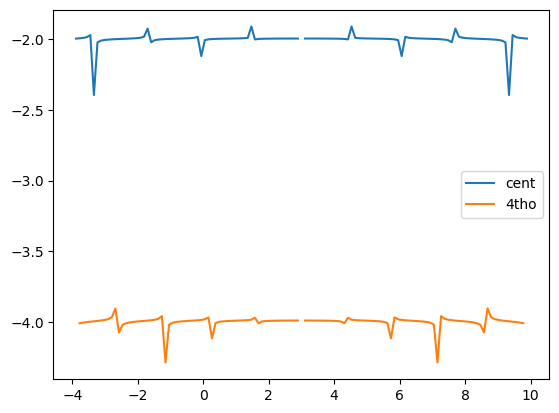

In [185]:
plt.plot(xx1[1:-1], m_cent[1:-1], label="cent")
plt.plot(xx1[2:-2], m_4tho[2:-2], label="4tho")
plt.legend()